## Introduction
In this third and last part I want to relate my thoughts and conclusions from the analysis as I progress. First I start by loading the libraries and the datasets created previously. See [airbnb01] and [airbnb02]

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Loading Datasets
reviews = pd.read_csv('airbnb_reviews_textblob.csv')
listing = pd.read_csv('airbnb_listing_imagereco.csv')

## DATA CLEANING
During my analyzis I noticed that some rows in listing dataFrame were NOT in the reviews dataFrame. Thus all those rows must be removed prior to any further analysis to avoid unclean results. For this on the next code I'm merging both dataFrames and dropping rows with not in common. 

In [12]:
common = reviews.merge(listing)
#reviews = reviews[reviews.id.isin(common.id)]
#listing = listing[listing.id.isin(common.id)]

<h3>Understanding the data</h3>
<ol>
<li> Types of data
<li> Removing Null values if exist.
<li> How many neighboorhoods.
<li> What space types there are.
<li> Bground and Fground colors. How many.
<li> Most common color combinations.
<li> Avg price by neighboorhood.
</ol>

In [13]:
# Checking type of every column in the dataset
reviews.dtypes

id                    int64
author               object
rating                int64
comments             object
Polarity            float64
Sentiment            object
Keywords_reviews     object
dtype: object

In [14]:
listing.dtypes

id                         int64
city                      object
neighborhood              object
name                      object
lat                      float64
lng                      float64
person_capacity            int64
space_type                object
picture_url               object
price_rate                 int64
image_description         object
image_dominantfgColor     object
image_dominantbgColor     object
dtype: object

In [15]:
# Looking for null values
listing.isnull().sum()

id                       0
city                     0
neighborhood             0
name                     0
lat                      0
lng                      0
person_capacity          0
space_type               0
picture_url              0
price_rate               0
image_description        0
image_dominantfgColor    0
image_dominantbgColor    0
dtype: int64

In [16]:
# 3 and 4: Neighborhoods and Space Type
print(f"Neighborhoods: {len(listing.neighborhood.unique())}")
print(f"Space type: {len(listing.space_type.unique())}")
# Size for both dataFrames
print(f"Reviews: {len(reviews.index)}")
print(f"Listing: {len(listing.index)}")

Neighborhoods: 43
Space type: 12
Reviews: 1348
Listing: 271


**Neighborhoods and Space type**
Using Describe is great way to get some quick statistics. For example here I've noticed that 116 out of 271 of the listings are located in Downtown Toronto, which also has the most expensive place of all at 139\$ per night. Average price is 67\$ with a standard deviation of 20.9.<br>

In [17]:
# Neighborhoods
listing.groupby(by='neighborhood')['price_rate']\
.describe()\
.sort_values(by='count', ascending=False)\
.head(5)

,count,mean,std,min,25%,50%,75%,max
neighborhood,,,,,,,,
Downtown Toronto,116.0,67.129310,20.956074,19.0,53.00,67.0,75.75,139.0
Garden District,21.0,49.761905,16.260088,11.0,41.00,51.0,60.00,75.0
Niagara,17.0,67.235294,10.991641,45.0,60.00,72.0,75.00,85.0
Palmerston/Little Italy,12.0,32.750000,8.955699,24.0,27.50,29.5,35.75,56.0
Harbourfront,12.0,73.000000,23.436568,44.0,57.75,71.5,78.00,130.0


**Now I will plot these top 5 neighborhood to better showcase density and distribution of prices. **

{'bodies': [<matplotlib.collections.PolyCollection at 0xf4cba90>,
 'cmaxes': <matplotlib.collections.LineCollection at 0xf4cba50>,
 'cmins': <matplotlib.collections.LineCollection at 0xf4cb670>,
 'cbars': <matplotlib.collections.LineCollection at 0xf4cb690>}

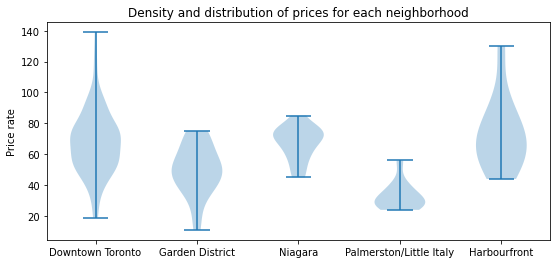

In [18]:
# Filtering data for just the 5 nieghborhoods

nbhood = ['Downtown Toronto', 'Garden District', 'Niagara', 'Palmerston/Little Italy', 'Harbourfront']

nb1 = listing.loc[listing['neighborhood'] == nbhood[0]]
nb2 = listing.loc[listing['neighborhood'] == nbhood[1]] 
nb3 = listing.loc[listing['neighborhood'] == nbhood[2]] 
nb4 = listing.loc[listing['neighborhood'] == nbhood[3]] 
nb5 = listing.loc[listing['neighborhood'] == nbhood[4]] 

data_to_plot = [nb1.price_rate, nb2.price_rate, nb3.price_rate, nb4.price_rate, nb5.price_rate]

# Creates a figure instance
fig1 = plt.figure(figsize=(9, 4))

# Create an axes instance
ax = fig1.subplots()
ax.set_title('Density and distribution of prices for each neighborhood')
ax.set_ylabel('Price rate')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(nbhood)

# Create the boxplot
ax.violinplot(dataset=data_to_plot)

From this plot I came out with this conclusions:
<ol>
<li>Downtown Toronto has the highest range of prices for the listings, its price density sits above the price average. It was expected for Downtown to be expensive.
<li>Niagara seems to have a tendency to have higher prices rather than low. Its average is close to that of DownTown toronto.
<li>Price rate distribution and density for Little Italy is low compared to other neighborhoods in our analysis. It is an affordable place to look for in airbnb. 
<li>Harbourfront lowest price rate is just below Downtown Toronto's average price rate. It is an expensive borough to live in. 
</ol>

**Space type**<br>
Majority of listings are described as condos, apartments and private rooms. 

In [19]:
listing.groupby(by='space_type')['price_rate']\
.describe()\
.sort_values(by='count', ascending=False)\
.head(5)

,count,mean,std,min,25%,50%,75%,max
space_type,,,,,,,,
Entire condominium,106.0,69.603774,16.309903,37.0,57.25,68.0,75.00,120.0
Entire apartment,82.0,56.975610,19.089766,11.0,44.00,53.0,70.50,130.0
Private room,46.0,33.304348,12.323184,14.0,25.00,32.0,41.75,66.0
Entire guest suite,16.0,51.687500,14.164363,19.0,43.25,54.0,57.75,75.0
Entire house,10.0,52.100000,22.338059,29.0,39.50,44.0,55.25,104.0


{'bodies': [<matplotlib.collections.PolyCollection at 0xf77a750>,
 'cmaxes': <matplotlib.collections.LineCollection at 0xf77a710>,
 'cmins': <matplotlib.collections.LineCollection at 0xf77a3b0>,
 'cbars': <matplotlib.collections.LineCollection at 0xf77a390>}

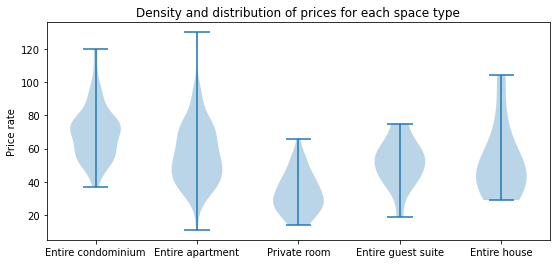

In [20]:
# Filtering data for just the 5 space types

stype = ['Entire condominium', 'Entire apartment', 'Private room', 'Entire guest suite', 'Entire house']

st1 = listing.loc[listing['space_type'] == stype[0]]
st2 = listing.loc[listing['space_type'] == stype[1]] 
st3 = listing.loc[listing['space_type'] == stype[2]] 
st4 = listing.loc[listing['space_type'] == stype[3]] 
st5 = listing.loc[listing['space_type'] == stype[4]] 

data_to_plot = [st1.price_rate, st2.price_rate, st3.price_rate, st4.price_rate, st5.price_rate]

# Creates a figure instance
fig1 = plt.figure(figsize=(9, 4))

# Create an axes instance
ax = fig1.subplots()
ax.set_title('Density and distribution of prices for each space type')
ax.set_ylabel('Price rate')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(stype)

# Create the boxplot
ax.violinplot(dataset=data_to_plot)

A few conclusions on density and distribution of prices for each space type:
<ol>
<li> Entire condos and apartments have a wide range of prices, however their density is on average higher than any other space type. Condos are more expensive than apartments. 
<li> Private rooms density is higher on its lowest range of prices.
<li> It is interesting o see listings labeled as Entire house have a considerably lower cost compared to other entire spaces.
</ol>
<br>
Next I will create a scatter plot to have an idea of the location in the map where prices are higher. 
<h3>Toronto - Airbnb price rate heatmap</h3>

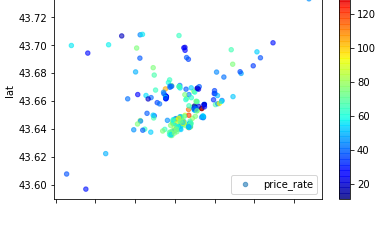

In [94]:
listing.plot(kind='scatter', x='lng', y='lat', label='price_rate',
c=listing['price_rate'], colorbar=True, cmap=plt.get_cmap('jet'), alpha=0.6
)
plt.legend()
plt.show()

<h3>Frequent words in listing title</h3>

<AxesSubplot:xlabel='Words'>

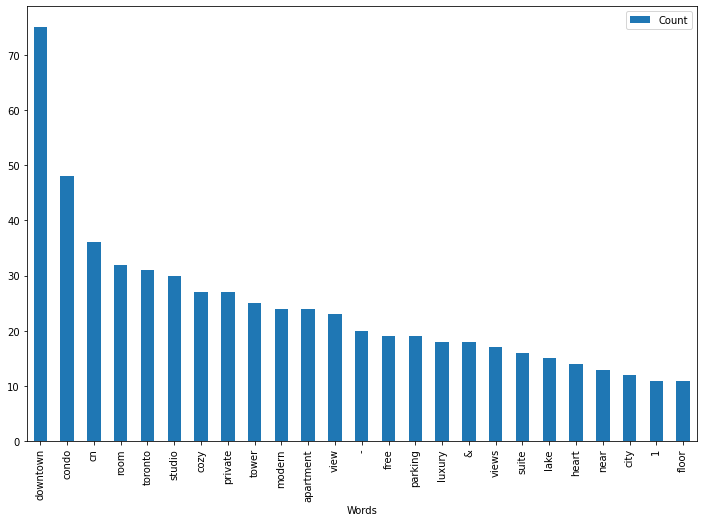

In [132]:
from collections import Counter
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

cnt = Counter()
list_names = []
for l in listing.name.values:
    list_names.append(l)

for i in list_names:
    words = i.lower().split()
    for w in words:
        if w not in en_stops:
            cnt[w] += 1
top_25w = cnt.most_common()
top_25w = top_25w[0:25]
# Create DataFrame
listing_names_df = pd.DataFrame(top_25w)
listing_names_df.rename(columns={0: 'Words', 1:'Count'}, inplace=True)
# Plot 
listing_names_df.plot(kind='bar', x='Words', y='Count', figsize=(12,8))


In [96]:
# Count of background colors
listing.image_dominantbgColor.value_counts()

White     123
Grey       82
Black      28
Brown      20
Blue       13
Green       3
Yellow      2
Name: image_dominantbgColor, dtype: int64

In [97]:
# Count of foreground colors
listing.image_dominantfgColor.value_counts()

White     125
Grey       82
Black      40
Brown      17
Yellow      2
Orange      2
Green       1
Blue        1
Red         1
Name: image_dominantfgColor, dtype: int64

In [98]:
# Grouping by fgcolor and bgcolor and counting number of unique groups.
listing.groupby(['image_dominantbgColor','image_dominantfgColor']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False)

,image_dominantbgColor,image_dominantfgColor,count
25,White,White,86
18,Grey,Grey,45
19,Grey,White,28
23,White,Grey,22
0,Black,Black,19
6,Blue,Grey,8
21,White,Black,8
9,Brown,Brown,7
12,Brown,White,6
15,Grey,Black,5


In [32]:
# Counting Sentiment values
reviews.Sentiment.value_counts()

Negative    824
Positve     499
Neutral      25
Name: Sentiment, dtype: int64

In [33]:
# Size for both dataFrames
print(f"Reviews: {len(reviews.index)}")
print(f"Listing: {len(listing.index)}")

Reviews: 1348
Listing: 271


Text(0.5, 1.0, 'Avg Polarity vs Foreground Color')

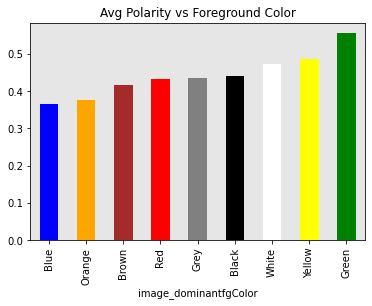

In [99]:
fgColor_Polarity = common.groupby(by='image_dominantfgColor')['Polarity'].mean().sort_values()
plot_fgColor_Polarity = fgColor_Polarity.plot(kind='bar', color=list(fgColor_Polarity.index.values))
plot_fgColor_Polarity.set_facecolor('0.90')
plot_fgColor_Polarity.set_title('Avg Polarity vs Foreground Color')
# reviews['Polarity'].loc[11533218].mean(axis=0)

Text(0.5, 1.0, 'Avg Polarity vs Background Color')

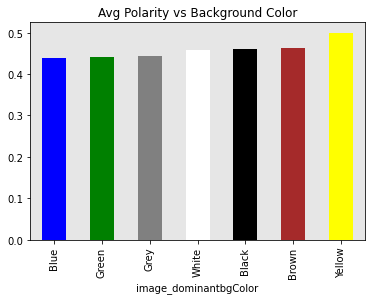

In [103]:
bgColor_Polarity = common.groupby(by='image_dominantbgColor')['Polarity'].mean().sort_values()
plot_bgColor_Polarity = bgColor_Polarity.plot(kind='bar', color=list(bgColor_Polarity.index.values))
plot_bgColor_Polarity.set_facecolor('0.90')
plot_bgColor_Polarity.set_title('Avg Polarity vs Background Color')

Text(0.5, 1.0, 'Avg Price vs Foreground Color')

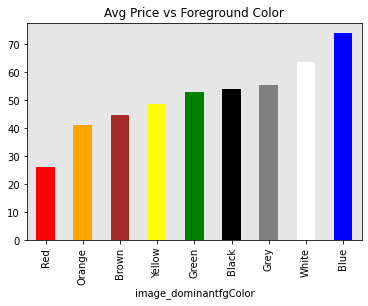

In [104]:
fgcolor_price = common.groupby(by='image_dominantfgColor')['price_rate'].mean().sort_values()
plot_fgcolor_price = fgcolor_price.plot(kind='bar', color=list(fgcolor_price.index.values))
plot_fgcolor_price.set_facecolor('0.90')
plot_fgcolor_price.set_title('Avg Price vs Foreground Color')

Text(0.5, 1.0, 'Avg Price vs Background Color')

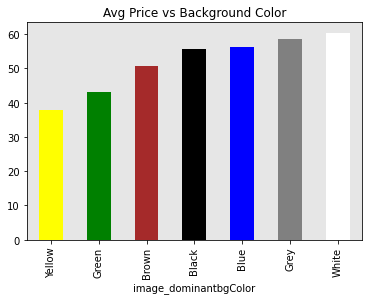

In [105]:
bgcolor_price = common.groupby(by='image_dominantbgColor')['price_rate'].mean().sort_values()
plot_bgcolor_price = bgcolor_price.plot(kind='bar', color=list(bgcolor_price.index.values))
plot_bgcolor_price.set_facecolor('0.90')
plot_bgcolor_price.set_title('Avg Price vs Background Color')

Text(0.5, 1.0, 'Polarity vs Background Color')

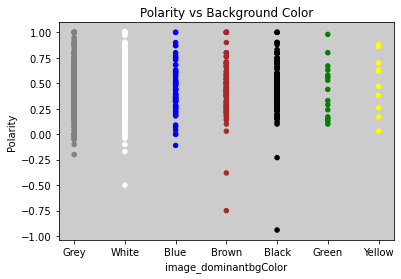

In [106]:
scatter_bgcolor_pol = common.reset_index().plot(kind='scatter', x='image_dominantbgColor', y='Polarity', c='image_dominantbgColor')
scatter_bgcolor_pol.set_facecolor('0.80')
scatter_bgcolor_pol.set_title('Polarity vs Background Color')

Text(0.5, 1.0, 'Polarity vs Foreground Color')

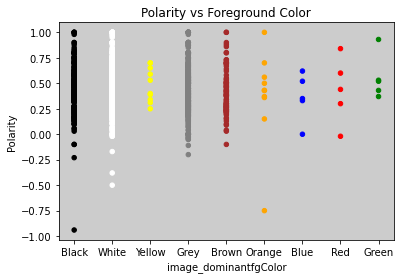

In [107]:
scatter_fgcolor_pol = common.reset_index().plot(kind='scatter', x='image_dominantfgColor', y='Polarity', c='image_dominantfgColor')
scatter_fgcolor_pol.set_facecolor('0.80')
scatter_fgcolor_pol.set_title('Polarity vs Foreground Color')

In [114]:
common.loc[common['Polarity'] < 0].sort_values(by='Polarity').head(10)

,id,author,rating,comments,Polarity,Sentiment,Keywords_reviews,city,neighborhood,name,lat,lng,person_capacity,space_type,picture_url,price_rate,image_description,image_dominantfgColor,image_dominantbgColor
1252,30567717,Harris,5,"You will not be disappointed, go ahead and book!",-0.94,Negative,book,Toronto,Harbourfront,Beautiful Bachelor Suite with Amazing View!,43.641210,-79.382260,2,Entire condominium,https://a0.muscache.com/im/pictures/f3c63bd7-c...,52,a tall building in a city,Black,Black
299,12007026,Isabela,2,Expect fucking frying smell at 10 in the eveni...,-0.75,Negative,"evening, fucking frying smell",Toronto,Downtown Toronto,3min Downtown YONGE/ BLOOR QUEENBED CLEAN,43.668500,-79.385960,2,Private room,https://a0.muscache.com/im/pictures/50f80400-b...,38,a kitchen with a wood floor,Orange,Brown
649,17682453,Juana,1,"absolutely gross room , there was mold in the ...",-0.50,Negative,"spiders, iam allergic, mold, mosquitoes, horri...",Toronto,Palmerston/Little Italy,Room Slick Monochome. - Little Italy,43.663190,-79.411240,2,Private room,https://a0.muscache.com/im/pictures/736569d6-e...,25,a bedroom with a bed and desk in a room,White,White
1160,27705416,Tarik,1,The place Iâ€™ve very small and uncomfortable....,-0.38,Negative,"ve, place iâ, owner",Toronto,Downtown Toronto,LUXURY LIVING IN THE HEART OF DOWNTOWN TORONTO,43.639190,-79.399530,4,Entire apartment,https://a0.muscache.com/im/pictures/10dd5390-2...,44,a living room filled with furniture and a larg...,White,Brown
937,21984758,Joe,3,It was no really good experience no internet s...,-0.23,Negative,"good experience, tv, internet service, canâ, t...",Toronto,Downtown Toronto,Centrally Located Condo With Beautiful Lake View,43.640010,-79.393490,6,Entire condominium,https://a0.muscache.com/im/pictures/44d9a22e-f...,53,a lit up city at night,Black,Black
483,15082256,Cali,4,"Nice place, insane view!",-0.20,Negative,"nice place, insane view",Toronto,Downtown Toronto,LUXURY! Prime Location+CN Tower View! FREE PA...,43.642580,-79.381570,8,Entire condominium,https://a0.muscache.com/im/pictures/3785b73b-2...,89,a view of a city with tall buildings in the ba...,Grey,Grey
544,15903030,Kiran,1,Everything about this location was a bit disap...,-0.17,Negative,"coffee machine, kitchen exhaust, old coffee gr...",Toronto,Garden District,Cozy 2 Bedrooms Loft at Downtown Core,43.654530,-79.373520,8,Entire apartment,https://a0.muscache.com/im/pictures/8f8c742c-0...,71,a kitchen with a wood floor,White,White
786,19202117,Cory,5,Close to everything downtown. If you arrive l...,-0.11,Negative,"bedroom unit, block, hr food mart, priced stu...",Toronto,Downtown Toronto,Sleek Penthouse Condo at Super Location Downtown!,43.649040,-79.387920,3,Entire apartment,https://a0.muscache.com/im/pictures/d02708d7-3...,69,a tall glass building in a city,Grey,Blue
908,21579122,Jennifer,4,Overall a nice place to stay. The TV never wor...,-0.10,Negative,"cable, host, stay, local tv, stick, previous g...",Toronto,Downtown Toronto,55th+ Floor Lake View Suite By Union Station,43.641788,-79.381874,3,Entire condominium,https://a0.muscache.com/im/pictures/59dd22d3-e...,51,a tall building in a city,Black,White
666,17682721,Catherine,5,Room was exactly as expected.,-0.10,Negative,room,Toronto,Palmerston/Little Italy,Room Soft Hue - Little Italy,43.662880,-79.410600,2,Private room,https://a0.muscache.com/im/pictures/83e6e001-b...,24,a bedroom with a bed in a room,Brown,Grey


In [120]:
reviews.loc[reviews.id == 17682453]

,id,author,rating,comments,Polarity,Sentiment,Keywords_reviews
689,17682453,Peter,5,Great place and real close to everything downt...,0.50,Neutral,great place
690,17682453,Tania,5,"This place is very close to down town, lots of...",0.35,Negative,"place, easy instructions, town, subway, happy ..."
691,17682453,Anu,4,Paperbox mgntâ€™s place has a great location a...,0.28,Negative,"s place, great location, paperbox mgntâ, hosts..."
692,17682453,Vrunda,2,They do not provide basic amenities in the kit...,-0.02,Negative,"host, kitchen, floors, bounty, basic amenities..."
693,17682453,Juana,1,"absolutely gross room , there was mold in the ...",-0.50,Negative,"spiders, iam allergic, mold, mosquitoes, horri..."


Text(0.5, 1.0, 'Price Rate vs Background Color')

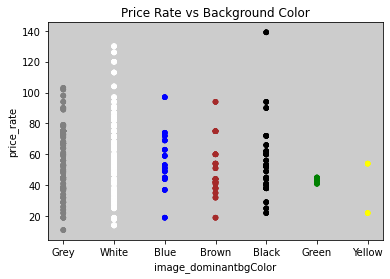

In [8]:
scatter_bgcolor_price = join_df.reset_index().plot(kind='scatter', x='image_dominantbgColor', y='price_rate', c='image_dominantbgColor')
scatter_bgcolor_price.set_facecolor('0.80')
scatter_bgcolor_price.set_title('Price Rate vs Background Color')

Text(0.5, 1.0, 'Price Rate vs Foreground Color')

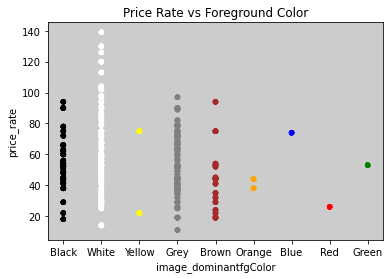

In [9]:
scatter_fgcolor_price = join_df.reset_index().plot(kind='scatter', x='image_dominantfgColor', y='price_rate', c='image_dominantfgColor')
scatter_fgcolor_price.set_facecolor('0.80')
scatter_fgcolor_price.set_title('Price Rate vs Foreground Color')

<AxesSubplot:xlabel='Words'>

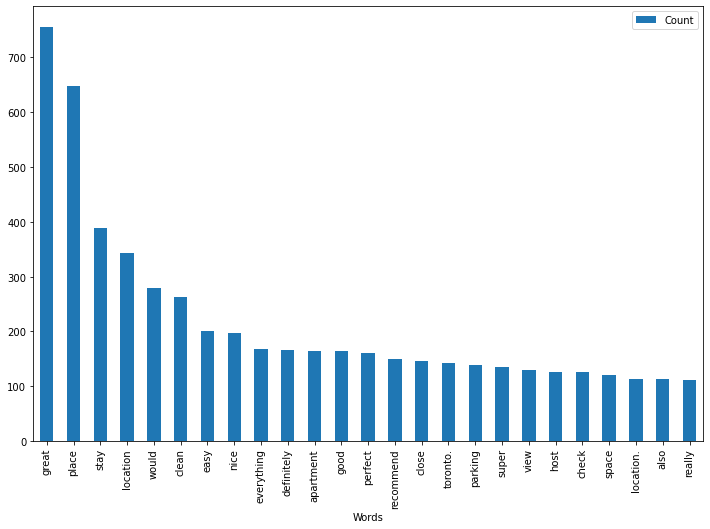

In [133]:
comments_cnt = Counter()
list_comments = []
for l in reviews.comments.values:
    list_comments.append(l)

for i in list_comments:
    words = i.lower().split()
    for w in words:
        if w not in en_stops:
            comments_cnt[w] += 1 
top_25c = comments_cnt.most_common()
top_25c = top_25c[0:25]
# Create DataFrame
comments_df = pd.DataFrame(top_25c)
comments_df.rename(columns={0: 'Words', 1:'Count'}, inplace=True)
# Plot 
comments_df.plot(kind='bar', x='Words', y='Count', figsize=(12,8))

In [137]:
reviews.rating.value_counts()

5    1073
4     195
3      58
2      11
1      11
Name: rating, dtype: int64